In [1]:
# import libraries
import numpy as np
import cv2
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# cv2 version
print(cv2.__version__)

# image path
path = './car_images/car_3.jpg'

# read image
image = cv2.imread(path)

# plot two images in parallel for better understanding
def plot_images(img1, img2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15,15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1)
    ax1.set(title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2)
    ax2.set(title=title2)

4.1.2


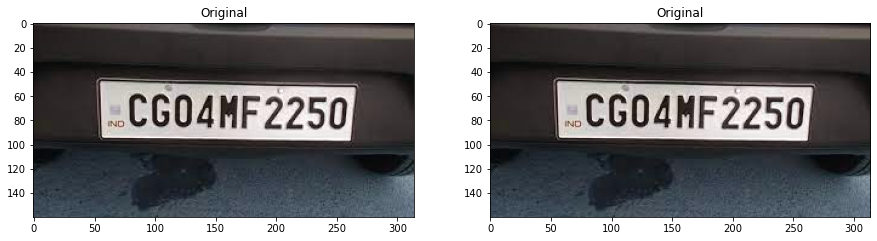

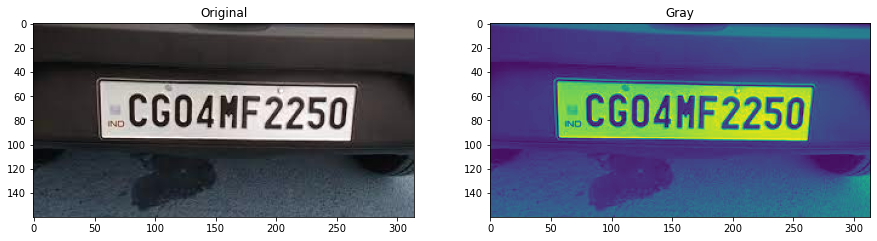

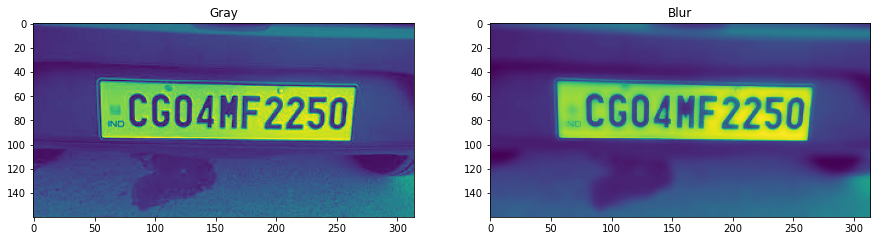

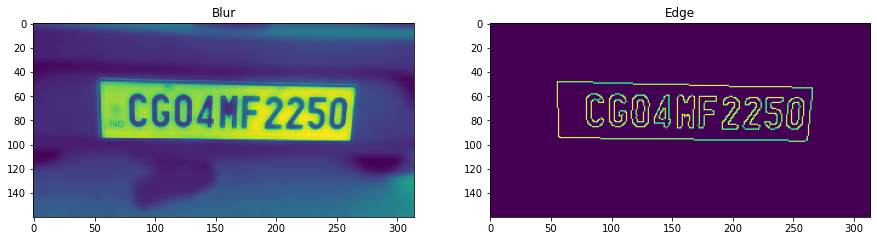

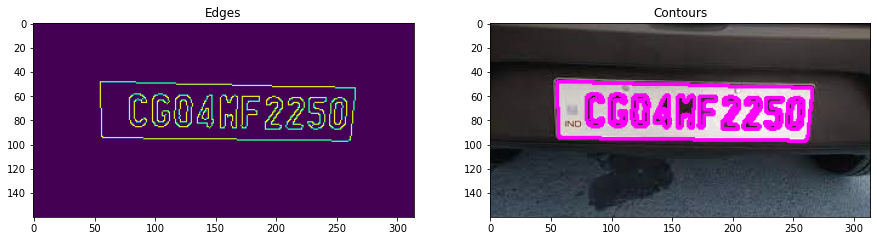

In [9]:
# plot original images
plot_images(image, image, title1 = 'Original', title2 = 'Original')

# convert one image into gray & then plot them
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_images(image, gray, title1 = 'Original', title2 = 'Gray')

# do fliter in gray image & then plot them
blur = cv2.bilateralFilter(gray, 11,90, 90)
plot_images(gray, blur, title1 = 'Gray', title2 = 'Blur')

# do image blur through canny edge detection & then plot them
edges = cv2.Canny(blur, 20, 300)
plot_images(blur, edges, title1 = 'Blur', title2 = 'Edge')

# find contours create copy of image to avoid distortion in actual image
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()

# drawing contours over copied image & then plot them
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255), 2)
plot_images(edges, image_copy, title1 = "Edges", title2 = "Contours")


Number of Contours in blur image:  30
Number of limited Contours:  10


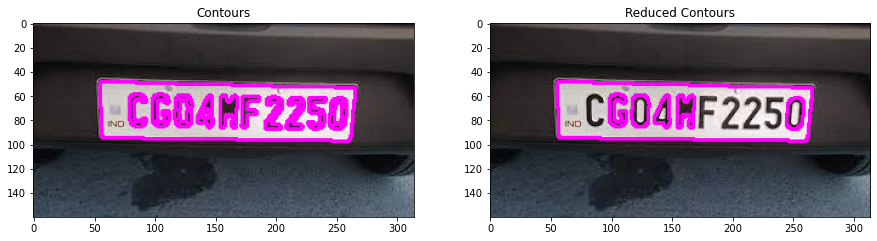

In [10]:
# length of contours in blurred image
print("Number of Contours in blur image: ", len(cnts))

# sort the contours from big to small & choose first 10 contours
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

# create another copy again of actual image to draw reduced contours upon it.
image_reduced_cnts = image.copy()

# drawing limited contours on the copied image & then plot them
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255,0,255), 2)
plot_images(image_copy, image_reduced_cnts, title1 = "Contours", title2 = "Reduced Contours")

print("Number of limited Contours: ", len(cnts))

In [11]:
# initailly we have no number plate
plate = None

for c in cnts:
    
    # finding length of contours
    perimeter = cv2.arcLength(c, True)
    
    # detecting edges or shape of the contour
    edge_count = cv2.approxPolyDP(c, 0.04*perimeter, True)
    
    
    if len(edge_count) == 4:
        
        # provides the bounding coordinates of rectangle
        x,y,w,h = cv2.boundingRect(c)
        
        # separate number plate from the actual image
        plate = image[y:y+h, x:x+w]
        break

# save the number plate 
cv2.imwrite("plate.png", plate)

True

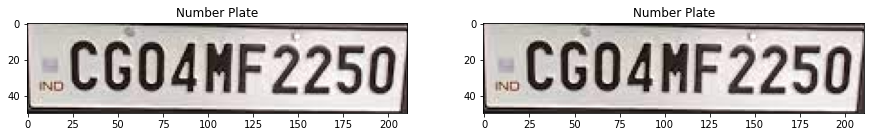

In [12]:
# plot only number plate
plot_images(plate, plate, title1 = "Number Plate", title2 = "Number Plate")

In [13]:
# import pytesseract to read characters out of images
import pytesseract

# set the tesseract path in the script before calling image_to_string
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(plate, lang='eng')
print(text)


=CGO4MF2250

